In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from corner import corner
from scipy.special import binom

# The problem

We want to know how well people classify AGN with mergers.

We have 8 classifiers and 144 classifiers, with 41 fake.

We want to know how many real mergers $M$ and isolated $N-M$.

We also have 70 control galaxies.

Base is $B=70$, control $C=74$, fake mergers $F_m=24$, and fake isolated galaxies$F_I=17$, and we have $N=8$ people classifying.

We want the number real mergers in $B$, $B_m$.


$B_j$ is the number of the mergers that classifier $j$ says.

$r_j$ is the true positive merger, $\hat F_{m,j}/F_{m,j}$, and a true positive isolated, $r'_j$, that is $\hat F_{I,j}/F_{I,j}$. Basically how many things they correctly called mergers that were mergers, and how many things they correctly identified as isolated mergers.


The likelihood should be
$$
L=\prod_j^N\sum_k f_b(k, B_m, r_j)f_b(B_j-k,B-B_m,1-r_j')
$$
He defined $f_b(k, B_m, r_j)$, which is the real merger rate, sort of a binomial distribution.

Also, we have $f_b(B_j-k, B-B_m, 1-r_j')$ as the isolated identified as a merger binomial.

$k$ is the number of observed, $B_m$ is the total sample, and $r_j$ is the probability.


So we are assuming $B_m$ total true mergers in the sample. We want to estimate that. By definition, there are $B-B_m$ true isolated variables in the sample.

Let's say then the person correctly classified $k$ mergers, and they mis-classified $B_j-k$.

OK, I think this basically makes sense. In this notation, 
$$
f_b(k, n, p) = \binom{n}{k}p^k(1-p)^k
$$

If we want to take into account the prior, we would want to have this prior distribution $f(\hat F_{m,j},F_{m,j},r_j)$ and $f(\hat F_{I,j}, F_{I,j}, r'_j)$. This makes the likelihood;
$$
L=\prod_j^N f(\hat F_{m,j},F_{m,j},r_j)f(\hat F_{I,j}, F_{I,j}, r'_j)\sum_k f_b(k, B_m, r_j)f_b(B_j-k,B-B_m,1-r_j')
$$


Let's look at a simple eample; for $B=70$ galaxies, and $B_j = 50$, they have a correct merger identification rate $r_j=16/24$, and a correct correct isolated merger rate $r_j'=11/70$.

In [2]:
def f_b(k, n, p):
    return binom(n,k)*p**k*(1-p)**(n-k)

In [3]:
def L(Bm, rj, rjp, Bj, B):
    L = 0
    for k in range(Bj+1):
        L += f_b(k, Bm, rj)*f_b(Bj-k, B-Bm, 1-rjp)
    return L

Text(0.5, 0, 'Estimated true underlying mergers $B_m$')

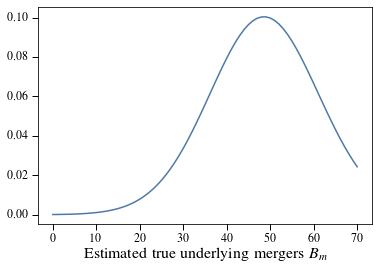

In [4]:
rj = 16/24
rjp = 11/17
Bj = 40
B = 70

Bm = np.arange(B+1)
plt.plot(Bm, L(Bm, rj, rjp, Bj, B))
plt.xlabel(r'Estimated true underlying mergers $B_m$')

43.125 4.512136411945011


Text(0.5, 0, 'Estimated true underlying mergers $B_m$')

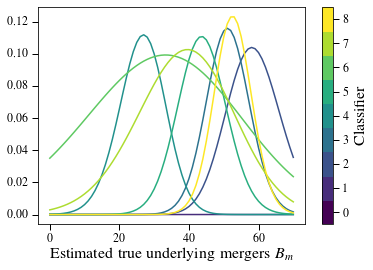

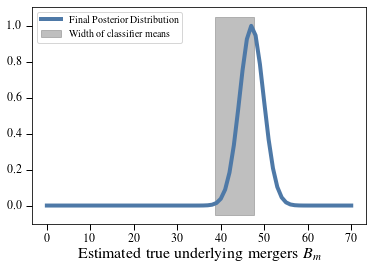

In [5]:
rjs = np.array([11, 16, 19, 20, 18, 17,18,20])/24
rjps = np.array([11, 14, 13, 12, 13, 8, 9, 13])/17
Bjs = np.array([50, 41, 45, 35, 39, 43, 44, 48])
print(Bjs.mean(), Bjs.std())
#cm = plt.cm.viridis
cm = plt.cm.get_cmap('viridis', len(rjs)+1)

for i in range(len(rjs)):
    plt.plot(Bm, L(Bm, rjs[i], rjps[i], Bjs[i], B), color=cm((i+1)/(len(rjs)+1)))
plt.xlabel(r'Estimated true underlying mergers $B_m$')

sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(vmin=0-0.5, vmax=len(rjs)+0.5))
plt.colorbar(sm, label='Classifier')

    
plt.figure()
lnLi = L(Bm, rjs[i], rjps[i], Bjs[i], B)*0

for i in range(len(rjs)):
    lnLi += np.log(L(Bm, rjs[i], rjps[i], Bjs[i], B))
plt.plot(Bm, np.exp(lnLi-lnLi.max()),  label='Final Posterior Distribution', lw=4)
plt.fill_betweenx(plt.gca().get_ylim(), Bjs.mean()-Bjs.std(), Bjs.mean()+Bjs.std(), alpha=0.5, 
                  color='gray', label=r'Width of classifier means')
plt.legend(loc='best')
plt.xlabel(r'Estimated true underlying mergers $B_m$')

In [6]:
Like = np.exp(lnLi-lnLi.max())
mu = sum(Bm*Like)/sum(Like)
var = sum(Bm**2*Like)/sum(Like) - mu**2
print(mu, var**0.5)

47.09346764620203 2.772492322058249


We want to make sure $r_j$ and $B_j$ need to be consistent. Each prior's $f_b(\hat F_{m,j}, F_{m,j}, r_j)$ and $f(\hat F_{I,j},F_{I,j},r_j')$ needs to be taken into account.

In the notation from before, this is equivalent to 

In [7]:
F_mhats = np.array([11, 16, 19, 20, 18, 17,18,20])
F_Ihats = np.array([11, 14, 13, 12, 13, 8, 9, 13])
F_m = 24
F_I = 17

This can be described by a beta distribution, which is just the conjugate prior to the binomial distribution. To do it correctly, we need to normalize, but I'm lazy.

In [8]:
def f_b(k, n, p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return binom(n,k)*p**k*(1-p)**(n-k)
# The arguments are Bm, number of true underlying mergers, rj, the fraction of correctly identified mergers, rjp, the number
# of correctly identified isolated galaxies, Bj, the number of galaxies that the classifier calls mergers, B, the total
# number of galaxies in the sample, F_m, the number of fake mergers, F_I, the number of fake isolated galaxies,
# F_mhat, the number that the classifier correctly identifies as mergers, and F_Ihat, the number
# that the classifier correctly identifies as isolted galaxies.
def L(Bm, rj, rjp, Bj, B, F_m, F_I, F_mhat, F_Ihat):
    '''
    This is the likelihood for an individual classifier
    '''
    L = 0
    for k in range(min(Bj+1,int(Bm))):
        L += f_b(k, Bm, rj)*f_b(Bj-k, B-Bm, 1-rjp)
    return L*f_b(F_mhat, F_m, rj)*f_b(F_Ihat, F_I, rjp)

def lnlike(args, Bjs, B, F_m, F_I, F_mhat, F_Ihat):
    '''
    This returns the product of all of the individual classifiers' results.
    '''
    Bm, rs = args[0], args[1:]
    rjs, rjps = np.split(rs, 2)
    lnLi = 0
    for i in range(len(rjs)):
        Li = L(Bm, rjs[i], rjps[i], Bjs[i], B, F_m, F_I, F_mhat[i], F_Ihat[i])
        if Li > 0:
            lnLi += np.log(Li)
    if ~np.isfinite(lnLi):
        # Sometimes, you accidentally take the log of a negative value.
        return -np.inf
    return lnLi

def lnprior(args):
    Bm, rs = args[0], args[1:]
    if (rs.min() < 0.20) or (rs.max() > 0.95) or (Bm < 0) or (Bm > 70):
        return -np.inf
    else:
        return 0
    
def lnprob(args, Bjs, B, F_m, F_I, F_mhat, F_Ihat):
    if ~np.isfinite(lnprior(args)):
        return -np.inf
    else:
        return lnlike(args, Bjs, B, F_m, F_I, F_mhat, F_Ihat)

In [9]:
initial = np.array([Bjs.mean()] + rjs.tolist() + rjps.tolist())

In [10]:
import emcee

pos = initial*(1 + 1e-2 * np.random.randn(64, len(initial)))
nwalkers, ndim = pos.shape

nsteps = 3000
nsteps = 1000

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(Bjs, B, F_m, F_I, F_mhats, F_Ihats))
state = sampler.run_mcmc(pos, nsteps, progress=True);


/etc/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
100%|██████████| 1000/1000 [03:51<00:00,  4.31it/s]


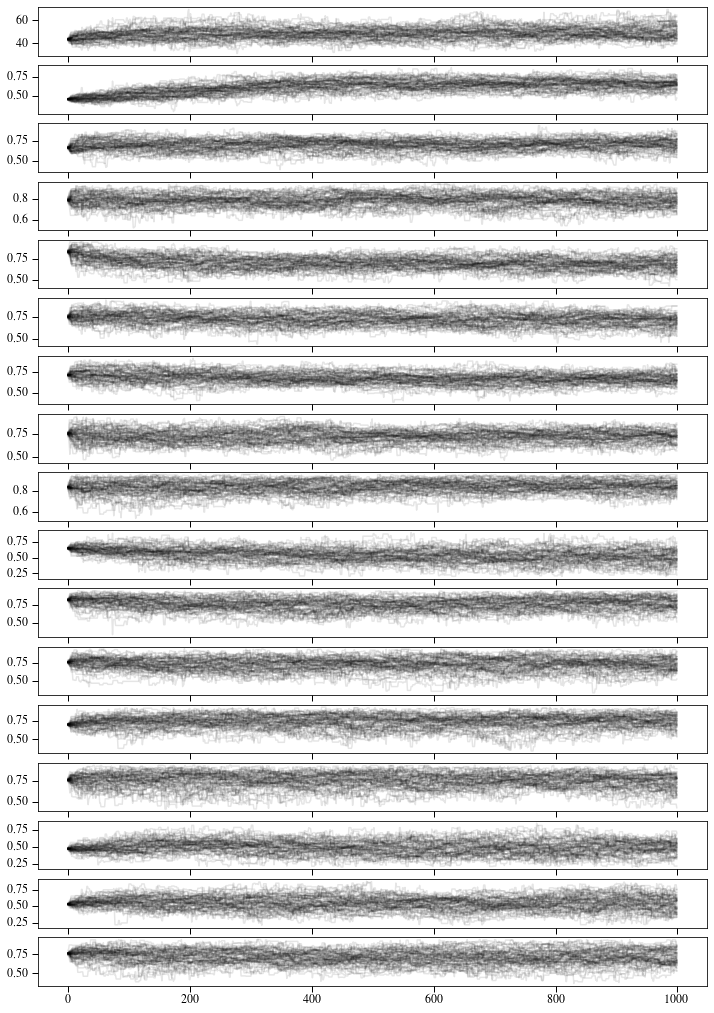

In [11]:
fig, axes = plt.subplots(nrows=ndim, figsize=(12, 18), sharex=True)
for j in range(ndim):
    for i in range(len(sampler.chain)):
        axes[j].plot(sampler.chain[i,:,j], color='k', alpha=0.1)

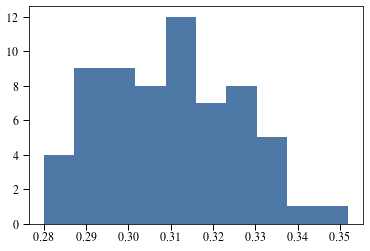

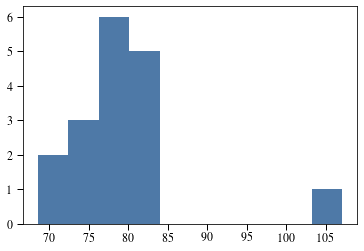

In [12]:
plt.hist(sampler.acceptance_fraction)
plt.figure()
plt.hist(sampler.get_autocorr_time(tol=0))
taus = sampler.get_autocorr_time(tol=0)

In [15]:
samples = sampler.get_chain(discard=2*int(taus.max()), flat=False, thin=5)
inds = (sampler.acceptance_fraction > 0.2)
samples = samples[:,inds].reshape(-1, ndim)

214


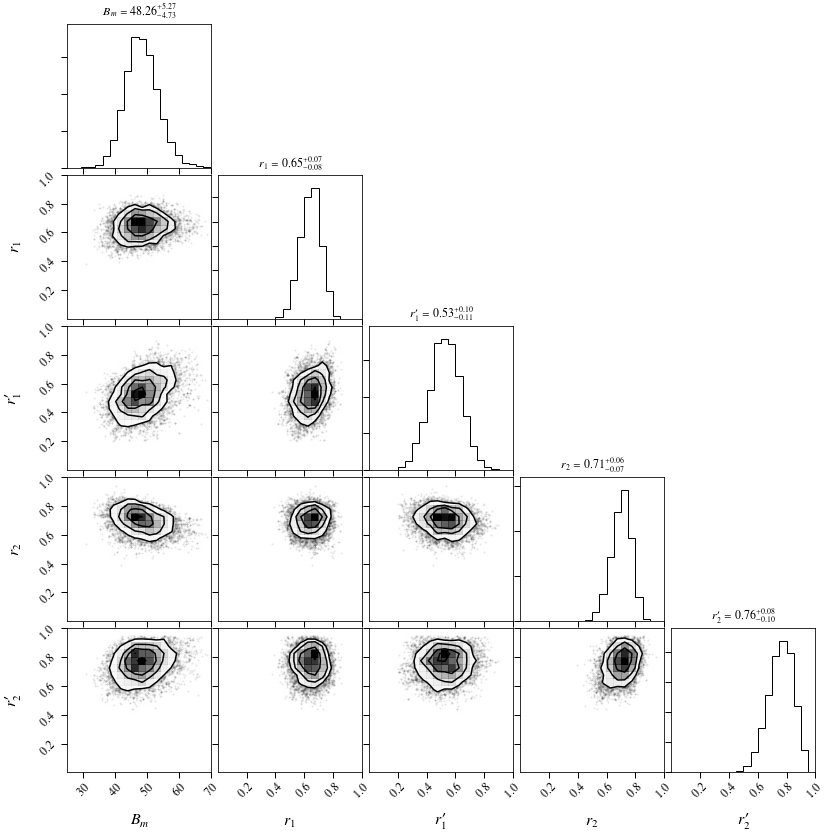

In [16]:
fig = corner(samples[:,[0,1,9,2,10]], labels=[r'$B_m$', r'$r_1$', r"$r_1'$", r'$r_2$', r"$r_2'$",],
            show_titles=True, range=[(25, 70)] + [(0,1)]*4)

In [ ]:
fig = corner(samples, range=[(25, 70)] + [(0,1)]*2*len(rjs), 
             truths = [Bjs.mean()] + (F_mhats/F_m).tolist() + (F_Ihats/F_I).tolist())
plt.savefig('corner_est.pdf', bbox_inches='tight')